In [1]:
from IPython.display import display
from model.utility.default_parameters import default_params1 as params
from model.utility.default_initial_state import default_initial_state1 as initial_state
from model.utility.initial_state_functions import fill_in_initial_state
from model.run import load_config, run, post_processing

initial_state = fill_in_initial_state(initial_state, params)


# Set the params for runs and timesteps
number_runs = 5
number_steps = 100

# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 22, 5, 69)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 22, 5, 69)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 21.40s


There is no periodicity with the bond stuff in the params, but there is a quite crazy price spike in the beginning.

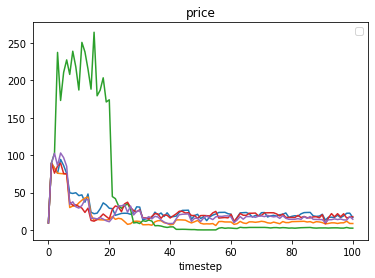

In [2]:
from model.utility.visualization import plot_all_sims

plot_all_sims(["price"], df)

Not really any periodicity when there is no bonds eitehr and the balanced -.07, .07 supply/demand

In [3]:
params["bond_create_schedule"] = [params["bond_create_schedule"][0].iloc[0:0]]

In [4]:
# Set the params for runs and timesteps
number_runs = 5
number_steps = 100

# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 22, 5, 69)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 22, 5, 69)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 23.47s


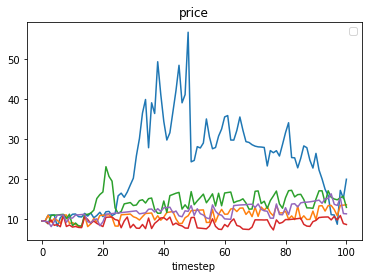

In [5]:
from model.utility.visualization import plot_all_sims

plot_all_sims(["price"], df)

<AxesSubplot:>

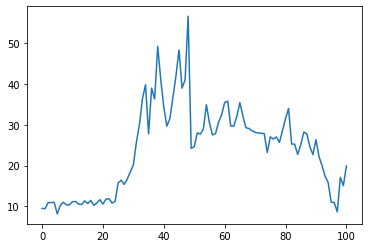

In [6]:
df[df['run'] == 1]['price'].plot(kind='line')

<AxesSubplot:>

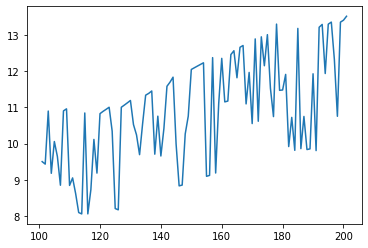

In [7]:
# No periodicity
df[df['run'] == 2]['price'].plot(kind='line')

In [8]:
params["demand_factor"] = [.03]
params["supply_factor"] = [-.04]

With the offset supply and demand factor it appears that there is sometimes the periodicity

In [9]:
# Set the params for runs and timesteps
number_runs = 5
number_steps = 100

# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 22, 5, 69)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 22, 5, 69)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 23.75s


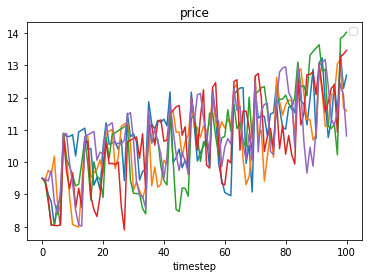

In [10]:
from model.utility.visualization import plot_all_sims

plot_all_sims(["price"], df)

In [11]:
from model.utility.default_parameters import default_params_soros as params
from model.utility.default_initial_state import default_initial_soros as initial_state

initial_state = fill_in_initial_state(initial_state, params)

# Set the params for runs and timesteps
number_runs = 5
number_steps = 100

# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps, psub_scenario_option = "Soros")

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 26, 10, 70)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 26, 10, 70)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 50.81s


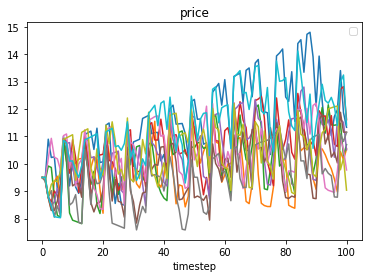

In [12]:
plot_all_sims(["price"], df)

The mean looks very different from each individual one!!

<AxesSubplot:xlabel='timestep'>

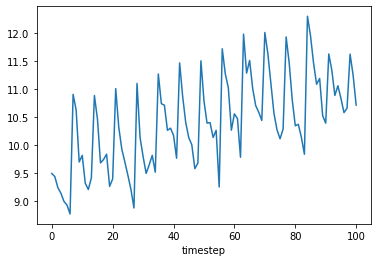

In [18]:
df.groupby('timestep')['price'].mean().plot(kind='line')

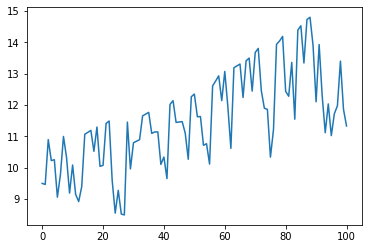

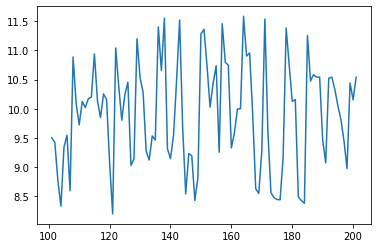

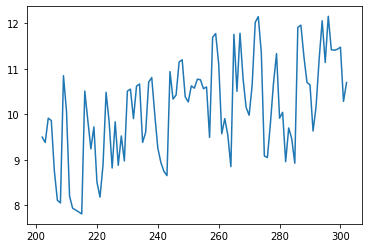

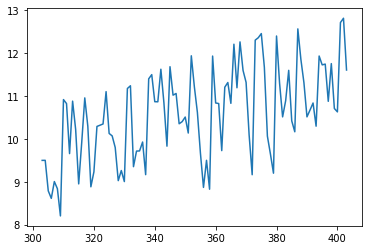

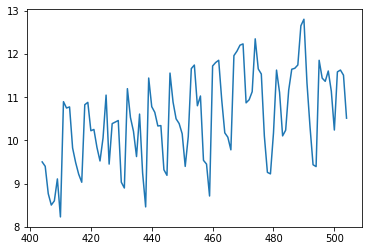

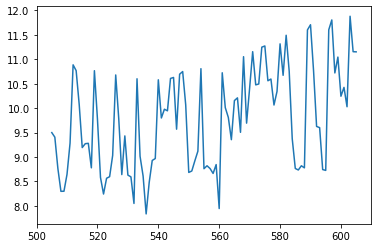

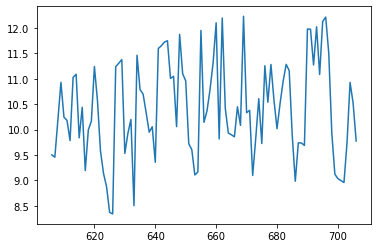

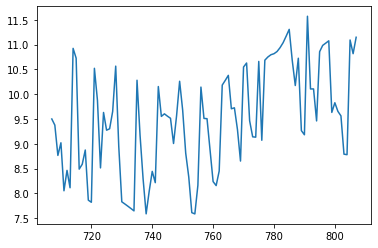

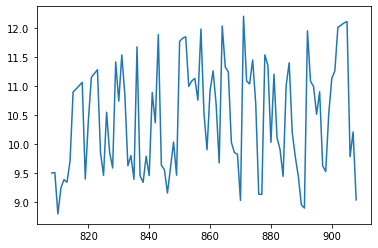

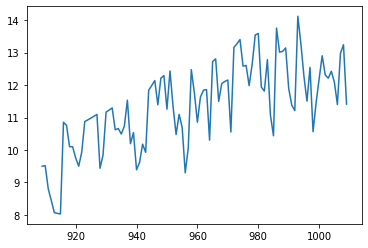

In [15]:
import matplotlib.pyplot as plt
for x in df['unique_id'].unique():
    df[df["unique_id"] == x]['price'].plot(kind='line')
    plt.show()